In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt

In [2]:
true_df = pd.read_csv('Resources/True.csv')  
fake_df = pd.read_csv('Resources/Fake.csv')  
onion_df = pd.read_csv('Resources/OnionOrNot.csv')  

In [3]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
onion_df.head()

,text,label
0,Entire Facebook Staff Laughs As Man Tightens P...,1
1,Muslim Woman Denied Soda Can for Fear She Coul...,0
2,Bold Move: Hulu Has Announced That They’re Gon...,1
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1
4,"For men looking for great single women, online...",1


In [6]:
true_df["target"] = 1

In [7]:
true_df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
fake_df["target"] = 0

In [9]:
fake_df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [10]:
df_truefake = pd.concat([true_df, fake_df]).reset_index(drop = True)

In [11]:
df_truefake.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [12]:
#swap the 0s and 1s around in the onion_df so that 0 = false and 1 = true like the fake and real csv files
onion_df = onion_df.replace({0:1, 1:0})

In [13]:
onion_df.head()

,text,label
0,Entire Facebook Staff Laughs As Man Tightens P...,0
1,Muslim Woman Denied Soda Can for Fear She Coul...,1
2,Bold Move: Hulu Has Announced That They’re Gon...,0
3,Despondent Jeff Bezos Realizes He’ll Have To W...,0
4,"For men looking for great single women, online...",0


In [14]:
onion_df = onion_df.rename(columns={'text': 'title', 'label': 'target'})

In [15]:
onion_df.head()

,title,target
0,Entire Facebook Staff Laughs As Man Tightens P...,0
1,Muslim Woman Denied Soda Can for Fear She Coul...,1
2,Bold Move: Hulu Has Announced That They’re Gon...,0
3,Despondent Jeff Bezos Realizes He’ll Have To W...,0
4,"For men looking for great single women, online...",0


In [16]:
df_truefake_clean = df_truefake[{"title", "target"}]

In [17]:
df_truefake_clean.head()

,title,target
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [18]:
df = pd.concat([df_truefake_clean, onion_df]).reset_index(drop = True)

In [19]:
df.head()

,title,target
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [20]:
df.count()

title     68898
target    68898
dtype: int64

In [21]:
df.groupby(["target"]).agg({"title": "count"})

,title
target,
0,32481
1,36417


In [22]:
#remove stopwords

stop = set(stopwords.words('english'))

df["filtered"] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [23]:
df.head()

,title,target,filtered
0,"As U.S. budget fight looms, Republicans flip t...",1,"As U.S. budget fight looms, Republicans flip f..."
1,U.S. military to accept transgender recruits o...,1,U.S. military accept transgender recruits Mond...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,1,FBI Russia probe helped Australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,1,Trump wants Postal Service charge 'much more' ...


In [24]:
from sklearn.model_selection import train_test_split
#X = df_clean["tokenised"]
#y = df_clean["target"]

X_train, X_test, y_train, y_test = train_test_split(df["filtered"], df["target"], random_state=0)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [26]:
X_train_vectorised = vect.transform(X_train)

X_train_vectorised

<51673x28755 sparse matrix of type '<class 'numpy.int64'>'
	with 565342 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorised, y_train)

C:\Users\maco_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9383840690900939


In [29]:
print(f"Training Data Score: {model.score(X_train_vectorised, y_train)}")
print(f"Testing Data Score: {model.score(vect.transform(X_test), y_test)}")

Training Data Score: 0.976622220502003
Testing Data Score: 0.9389840348330915


In [30]:
X_test.values[20]

'Pope Says American Nuns Too Focused On Poor, Not Enough On Gay Bashing'

In [31]:
y_test.values[20]

1

In [32]:
model.predict(vect.transform(["Pope Says American Nuns Too Focused On Poor, Not Enough On Gay Bashing"]))

array([1], dtype=int64)

In [33]:
# Save the model
#model.save("real_or_fake_model.h5")

In [34]:
import pickle

pkl_filename = "real_or_fake_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [35]:
with open(pkl_filename, 'rb') as file:
    news_model = pickle.load(file)

In [36]:
news_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
news_model.predict(vect.transform(["Pope Says American Nuns Too Focused On Poor, Not Enough On Gay Bashing"]))

array([1], dtype=int64)

In [38]:
X_test.count()

17225

In [39]:
y_test.count()

17225

In [46]:
X_train.count()

51673

In [47]:
y_train.count()

51673

In [40]:
test_data = list(zip(X_test, y_test))

In [41]:
df_test = pd.DataFrame(test_data, columns = ['title', 'target']) 

In [42]:
df_test.head()

,title,target
0,Listen To Reaction Of U.S. Troops When David L...,0
1,Ex-convict coal magnate says run Senate,1
2,Ted Cruz Threatens Voters: ‘Every Vote For Don...,0
3,Florida Man Arrested For Calling 911 After His...,1
4,Roger Goodell: ‘It Nearly Impossible For Leagu...,0


In [49]:
train_data = list(zip(X_train, y_train))

In [55]:
df_train = pd.DataFrame(train_data, columns = ['title', 'target']) 

In [57]:
df_train.head()

title     51673
target    51673
dtype: int64

In [43]:
df_test.to_csv('Test Data/test_data.csv', index = False)

In [58]:
df_train.to_csv('Test Data/train_data.csv', index = False)

In [44]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, predictions , labels=[0, 1])

Text(0.5, 15.0, 'predictions')

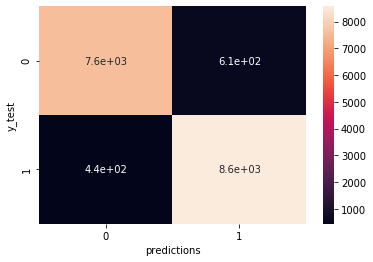

In [45]:
#plot the confusion matrix
import seaborn as sns 
ax= plt.subplot()
sns.heatmap(con_matrix, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')